In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import cftime
import calendar
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.ticker as mticker
from matplotlib.colors import TwoSlopeNorm
import imageio
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime

In [7]:
aod = xr.open_dataset('/nird/datalake/NS1004K/elihho/eVolv2k_v3_EVA_AOD_-500_1900_1_ym.nc')
aod

<xarray.Dataset> Size: 2MB
Dimensions:    (time: 2401, bnds: 2, lat: 96)
Coordinates:
  * time       (time) float32 10kB -500.0 -499.0 -498.0 ... 1.899e+03 1.9e+03
  * lat        (lat) float32 384B 88.57 86.72 84.86 ... -84.86 -86.72 -88.57
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 38kB ...
    aod550     (time, lat) float32 922kB ...
    reff       (time, lat) float32 922kB ...
Attributes: (12/13)
    CDI:                           Climate Data Interface version 2.0.5 (http...
    Conventions:                   CF-1.6
    title:                         EVA v1.2: stratospheric AOD
    EVA_reference:                 Toohey, M., Stevens, B., Schmidt, H., and ...
    EVA_source_code:               https://github.com/matthew2e/easy-volcanic...
    input_vssi_file:               eVolv2k_v3_ds_1.nc
    ...                            ...
    input_forcing_parameter_file:  EVAv1_parameter_set_piBG.nc
    input_grid_file:               eva_gridfile_echam_T63_sw.nc
    input_Mie_file:                eva_Mie_lookuptables.nc
    history:                       Sat Aug 27 15:25:49 2022: cdo yearmean eVo...
    frequency:                     year
    CDO:                           Climate Data Operators version 2.0.5 (http...

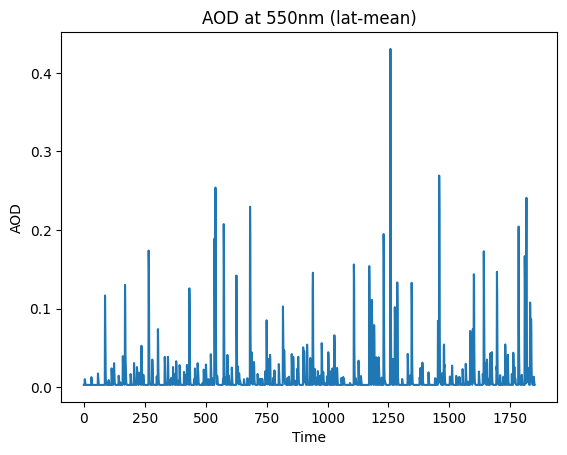

In [10]:
aod_0_1850 = aod.sel(time = slice(0., 1850.))
aod_timeseries = aod_0_1850["aod550"].mean(dim="lat")

# Plot
aod_timeseries.plot()
plt.title("AOD at 550nm (lat-mean)")
plt.ylabel("AOD")
plt.xlabel("Time")
plt.show()

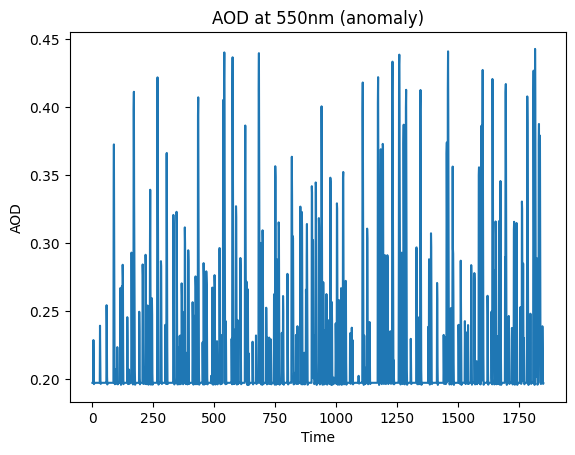

In [13]:
aod_ref = aod_0_1850["reff"].mean(dim="lat")
aod_anom = aod_ref - aod_timeseries

aod_anom.plot()
plt.title("AOD at 550nm (anomaly)")
plt.ylabel("AOD")
plt.xlabel("Time")
plt.show()

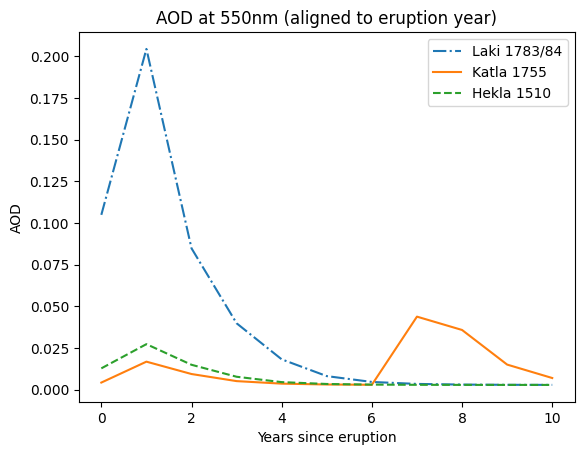

In [22]:
aod_laki = aod.sel(time=slice(1783., 1793))
aod_laki = aod_laki["aod550"].mean(dim="lat")

aod_katla = aod.sel(time=slice(1755., 1765))
aod_katla = aod_katla["aod550"].mean(dim="lat")

aod_hekla = aod.sel(time=slice(1510., 1520))
aod_hekla = aod_hekla["aod550"].mean(dim="lat")

t_laki   = aod_laki['time']   - aod_laki['time'].values[0]
t_katla  = aod_katla['time']  - aod_katla['time'].values[0]
t_hekla  = aod_hekla['time']  - aod_hekla['time'].values[0]

plt.plot(t_laki,  aod_laki,  linestyle="-.", label="Laki 1783/84")
plt.plot(t_katla, aod_katla, linestyle="-",  label="Katla 1755")
plt.plot(t_hekla, aod_hekla, linestyle="--", label="Hekla 1510")

plt.title("AOD at 550nm (aligned to eruption year)")
plt.ylabel("AOD")
plt.xlabel("Years since eruption")
plt.legend()
plt.show()